<a href="https://colab.research.google.com/github/evelinnkiss/Time_Series_Forecasting_of_Population_Growth/blob/main/project_time_series_forecasting_of_population_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Time Series Forecasting of Population Growth**

In this project, i will analyze historical population data and build a model to forecast future population growth. The dataset contains population estimates from 1960 to 2020, and i will use time series analysis to make predictions for the next 5 years.

**Steps:**
1. Data Import and Exploration
2. Data Preprocessing and Cleaning
3. Exploratory Data Analysis (EDA)
4. Time Series Forecasting using Prophet
5. Results and Conclusion

**Source of datasets:**
https://data.worldbank.org/indicator/SP.POP.TOTL?end=2020&start=1960&view=chart

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
pd.set_option('display.max_columns', None)  # display all columns
pd.set_option('display.width', 200)        # set the total display width



# **Step 1. Data Import and Exploration**


In [ ]:
from google.colab import drive

# Pripojenie k Google Drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the chardet library
import chardet

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open("/content/drive/MyDrive/Time_Series_Analysis/world_pop_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))
with open("/content/drive/MyDrive/Time_Series_Analysis/metadata_country.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
# for the first file (ASCII encoded)
file1 = pd.read_csv('/content/drive/MyDrive/Time_Series_Analysis/world_pop_data.csv', encoding='ascii')

# for the second file (UTF-8 encoded)
file2 = pd.read_csv('/content/drive/MyDrive/Time_Series_Analysis/metadata_country.csv', encoding='utf-8')

In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   Indicator Code  266 non-null    object 
 3   1960            264 non-null    float64
 4   1961            264 non-null    float64
 5   1962            264 non-null    float64
 6   1963            264 non-null    float64
 7   1964            264 non-null    float64
 8   1965            264 non-null    float64
 9   1966            264 non-null    float64
 10  1967            264 non-null    float64
 11  1968            264 non-null    float64
 12  1969            264 non-null    float64
 13  1970            264 non-null    float64
 14  1971            264 non-null    float64
 15  1972            264 non-null    float64
 16  1973            264 non-null    float64
 17  1974            264 non-null    flo

In [ ]:
file1.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.650000e+02,2.650000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.173116e+08,1.188586e+08,1.209679e+08,1.235882e+08,1.262297e+08,1.289366e+08,1.317868e+08,1.346309e+08,1.375436e+08,1.405603e+08,1.436425e+08,1.468257e+08,1.499505e+08,1.530704e+08,1.561728e+08,1.592234e+08,1.622437e+08,1.652461e+08,1.683007e+08,1.714292e+08,1.745967e+08,1.778498e+08,1.812371e+08,1.846651e+08,1.880921e+08,1.915868e+08,1.951841e+08,1.988786e+08,2.026144e+08,2.063469e+08,2.093348e+08,2.130170e+08,2.174152e+08,2.210175e+08,2.245836e+08,2.272838e+08,2.307867e+08,2.342836e+08,2.377474e+08,2.411680e+08,2.445656e+08,2.479476e+08,2.513282e+08,2.547259e+08,2.581470e+08,2.615940e+08,2.650680e+08,2.685631e+08,2.721130e+08,2.756800e+08,2.792605e+08,2.828299e+08,2.875460e+08,2.912569e+08,2.950070e+08,2.987776e+08,3.025863e+08,3.063996e+08,3.101530e+08,3.138333e+08,3.174775e+08
std,3.705555e+08,3.749081e+08,3.814322e+08,3.899277e+08,3.984666e+08,4.072394e+08,4.165735e+08,4.258523e+08,4.353820e+08,4.452976e+08,4.554626e+08,4.659363e+08,4.761773e+08,4.863722e+08,4.964535e+08,5.062754e+08,5.159367e+08,5.254753e+08,5.351654e+08,5.450888e+08,5.551269e+08,5.654653e+08,5.763200e+08,5.873144e+08,5.982674e+08,6.094354e+08,6.209471e+08,6.327901e+08,6.447416e+08,6.566162e+08,6.673801e+08,6.789603e+08,6.913658e+08,7.025413e+08,7.136142e+08,7.233879e+08,7.342872e+08,7.451663e+08,7.559233e+08,7.664802e+08,7.768936e+08,7.871832e+08,7.973899e+08,8.075846e+08,8.177962e+08,8.280534e+08,8.383392e+08,8.486307e+08,8.590467e+08,8.695165e+08,8.800214e+08,8.905570e+08,9.027707e+08,9.135917e+08,9.245024e+08,9.354553e+08,9.465108e+08,9.575844e+08,9.684065e+08,9.789569e+08,9.893473e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,5.707000e+03,5.770000e+03,5.786000e+03,5.819000e+03,5.903000e+03,6.064000e+03,6.319000e+03,6.650000e+03,7.018000e+03,7.357000e+03,7.631000e+03,7.825000e+03,7.951000e+03,8.041000e+03,8.110000e+03,8.211000e+03,8.341000e+03,8.481000e+03,8.637000e+03,8.787000e+03,8.910000e+03,9.014000e+03,9.110000e+03,9.194000e+03,9.259000e+03,9.298000e+03,9.317000e+03,9.328000e+03,9.332000e+03,9.344000e+03,9.392000e+03,9.478000e+03,9.593000e+03,9.724000e+03,9.871000e+03,9.848000e+03,9.827000e+03,9.846000e+03,9.880000e+03,9.945000e+03,1.000900e+04,1.006900e+04,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,6.241900e+05,6.399775e+05,6.573225e+05,6.762058e+05,6.966062e+05,7.184478e+05,7.309252e+05,7.556548e+05,7.716348e+05,7.758742e+05,7.812968e+05,7.907865e+05,8.031138e+05,8.186730e+05,8.397362e+05,8.608990e+05,8.819105e+05,9.030340e+05,9.244025e+05,9.462650e+05,9.752650e+05,9.975220e+05,1.025695e+06,1.056501e+06,1.087250e+06,1.122457e+06,1.133996e+06,1.148284e+06,1.170

In [ ]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  265 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   216 non-null    object
 3   SpecialNotes  98 non-null     object
 4   TableName     265 non-null    object
dtypes: object(5)
memory usage: 10.5+ KB


In [ ]:
file2.describe()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
count,265,217,216,98,265
unique,265,7,4,81,265
top,ABW,Europe & Central Asia,High income,Fiscal year end: June 30; reporting period for...,Aruba
freq,1,58,79,8,1


In [ ]:
# how much we have nan values
file1.isnull().sum().sum()

103

In [ ]:
# how much we have nan values
file2.isnull().sum().sum()

264

**Missing Data of file1:**
There are missing values in several columns:

*   1960–1989: All of these columns have 264 non-null values, indicating 2 missing
*   1990–2020: These columns mostly have 265 non-null values, indicating 1 missing value in each.  And few years like 1992, 2012, and onward,  drop back to 264 non-null values.

The other columns (Country Code, Indicator Name, and Indicator Code) are complete, with no missing data.

**Total Missing Values:**
103


**Missing Data of file2:**
There are missing values in 3 columns (file2 has 5 columns):

*   Region: 48 missing values
*   IncomeGroup: 49 missing values
*   SpecialNotes: 167 missing values (more than half of the entries are missing)

**Total Missing Values:**
264


In [ ]:
# identyfing duplicate rows
duplicates1 = file1[file1.duplicated()]
print(duplicates1)

Empty DataFrame
Columns: [Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []


In [ ]:
duplicates2 = file2[file2.duplicated()]
print(duplicates2)

Empty DataFrame
Columns: [Country Code, Region, IncomeGroup, SpecialNotes, TableName]
Index: []


In [ ]:
duplicatescolumn = file1[file1['Country Code'].duplicated()]
print(duplicatescolumn)

Empty DataFrame
Columns: [Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []


In [ ]:
print(file2['Region'].value_counts())
print(file2['IncomeGroup'].value_counts())
print(file2['SpecialNotes'].value_counts())

Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64
IncomeGroup
High income            79
Lower middle income    55
Upper middle income    55
Low income             27
Name: count, dtype: int64
SpecialNotes
Fiscal year end: June 30; reporting period for national accounts data: FY.                                                                                                                                                                                                                                                                                          8
Fiscal year end: March 31; reporting period for national accounts data: CY.                                                                                                                                                    

In [ ]:
# checking if there is any correlation between region and incomeGroup
region_income_group = file2.groupby(['Region', 'IncomeGroup']).size()
print(region_income_group)

Region                      IncomeGroup        
East Asia & Pacific         High income            14
                            Low income              1
                            Lower middle income    14
                            Upper middle income     8
Europe & Central Asia       High income            37
                            Lower middle income     4
                            Upper middle income    17
Latin America & Caribbean   High income            16
                            Lower middle income     6
                            Upper middle income    19
Middle East & North Africa  High income             8
                            Low income              2
                            Lower middle income     7
                            Upper middle income     4
North America               High income             3
South Asia                  Low income              1
                            Lower middle income     6
                            Upper 

**Result: Any duplicate rows or country code column**

# **Step 2.  Data Preprocessing and Cleaning**


In [ ]:
merged_df = pd.merge(file1, file2, on='Country Code', how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   Indicator Code  266 non-null    object 
 3   1960            264 non-null    float64
 4   1961            264 non-null    float64
 5   1962            264 non-null    float64
 6   1963            264 non-null    float64
 7   1964            264 non-null    float64
 8   1965            264 non-null    float64
 9   1966            264 non-null    float64
 10  1967            264 non-null    float64
 11  1968            264 non-null    float64
 12  1969            264 non-null    float64
 13  1970            264 non-null    float64
 14  1971            264 non-null    float64
 15  1972            264 non-null    float64
 16  1973            264 non-null    float64
 17  1974            264 non-null    flo

*2.1 Handle the missing values from file 1*


In [ ]:
# defining rows with missing values
rows_with_nan = file1[file1.isnull().any(axis=1)]

print(rows_with_nan)

    Country Code       Indicator Name Indicator Code       1960       1961       1962       1963       1964       1965       1966       1967       1968       1969       1970       1971       1972  \
69           ERI  "Population, total"    SP.POP.TOTL  1007586.0  1033320.0  1060489.0  1088859.0  1118152.0  1148188.0  1178875.0  1210304.0  1242633.0  1276122.0  1310947.0  1347180.0  1384789.0   
110          INX  "Population, total"    SP.POP.TOTL        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
127          KWT  "Population, total"    SP.POP.TOTL   269026.0   300581.0   337346.0   378756.0   423900.0   472032.0   523169.0   577164.0   632911.0   688972.0   744444.0   798639.0   851918.0   
196          PSE  "Population, total"    SP.POP.TOTL        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   

    

In [ ]:
nan_count_per_row = rows_with_nan.isnull().sum(axis=1)

# displaying the rows with their NaN counts
print(nan_count_per_row)



69      9
110    61
127     3
196    30
dtype: int64


In [ ]:
nan_count_per_row_p = rows_with_nan.isnull().sum(axis=1) / file1.shape[1] * 100
# displaying the rows with their NaN counts in %
print(nan_count_per_row_p)

69     14.0625
110    95.3125
127     4.6875
196    46.8750
dtype: float64


In [ ]:
filtered_df = merged_df.loc[nan_count_per_row.index]
print(filtered_df)

    Country Code       Indicator Name Indicator Code       1960       1961       1962       1963       1964       1965       1966       1967       1968       1969       1970       1971       1972  \
69           ERI  "Population, total"    SP.POP.TOTL  1007586.0  1033320.0  1060489.0  1088859.0  1118152.0  1148188.0  1178875.0  1210304.0  1242633.0  1276122.0  1310947.0  1347180.0  1384789.0   
110          INX  "Population, total"    SP.POP.TOTL        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
127          KWT  "Population, total"    SP.POP.TOTL   269026.0   300581.0   337346.0   378756.0   423900.0   472032.0   523169.0   577164.0   632911.0   688972.0   744444.0   798639.0   851918.0   
196          PSE  "Population, total"    SP.POP.TOTL        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   

    

**Rows with nan values where % is higher than 90% would be deleted**

In [ ]:
indexes_to_delete = [110]
merged_df = merged_df.drop(indexes_to_delete)


In [ ]:
# converting missing values to numeric
row_slice = pd.to_numeric(merged_df.loc[196, '1960':'1990'], errors='coerce')

# interpolating missing values according the first known value which is 1990
row_slice = row_slice.interpolate(limit_direction='forward')

row_slice = row_slice.bfill()

# assigning the result back to the DataFrame
merged_df.loc[196, '1960':'1990'] = row_slice

In [ ]:
# converting missing values to numeric
row_slice = pd.to_numeric(merged_df.loc[127, '1990':'1995'], errors='coerce')

# interpolating missing values according the first known value which is 1990
row_slice = row_slice.interpolate(limit_direction='forward')

row_slice = row_slice.bfill()

# assigning the result back to the DataFrame
merged_df.loc[127, '1990':'1995'] = row_slice

In [ ]:

# extending the data slice to include values before 2012
row_slice = pd.to_numeric(merged_df.loc[69, '1960':'2020'], errors='coerce')

# interpolating missing values based on the full trend
row_slice = round(row_slice.rolling(window=16, min_periods=5).mean()['1960':'2021'],0)

# Assign the result back to the DataFrame
merged_df.loc[69, '2012':'2020'] = row_slice.loc['2012':'2020']

# Check results
print(merged_df.loc[69, '2012':'2020'])

2012    2694435.0
2013    2730095.0
2014    2770377.0
2015    2814790.0
2016    2862279.0
2017    2911035.0
2018    2958810.0
2019    3003540.0
2020    3044073.0
Name: 69, dtype: object


In [ ]:
print(merged_df.loc[[69, 196, 127]])

    Country Code       Indicator Name Indicator Code       1960       1961       1962       1963       1964       1965       1966       1967       1968       1969       1970       1971       1972  \
69           ERI  "Population, total"    SP.POP.TOTL  1007586.0  1033320.0  1060489.0  1088859.0  1118152.0  1148188.0  1178875.0  1210304.0  1242633.0  1276122.0  1310947.0  1347180.0  1384789.0   
196          PSE  "Population, total"    SP.POP.TOTL  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0  1978248.0   
127          KWT  "Population, total"    SP.POP.TOTL   269026.0   300581.0   337346.0   378756.0   423900.0   472032.0   523169.0   577164.0   632911.0   688972.0   744444.0   798639.0   851918.0   

          1973       1974       1975       1976       1977       1978       1979       1980       1981       1982       1983       1984       1985       1986       1987       1988       1989  \
69   1423

*2.2 Handle the missing values from file 2*


In [ ]:
#  dropping special notes and tablename column
merged_df = merged_df.drop(['SpecialNotes', 'TableName'], axis=1)

In [ ]:
# defining rows with missing values, should be just categorical
rows_with_nan = merged_df[merged_df.isnull().any(axis=1)]
print(rows_with_nan.loc[:,:])

    Country Code       Indicator Name Indicator Code          1960          1961          1962          1963          1964          1965          1966          1967          1968          1969  \
1            AFE  "Population, total"    SP.POP.TOTL  1.308368e+08  1.341598e+08  1.376146e+08  1.412020e+08  1.449202e+08  1.487700e+08  1.527527e+08  1.568765e+08  1.611564e+08  1.656118e+08   
3            AFW  "Population, total"    SP.POP.TOTL  9.639642e+07  9.840722e+07  1.005070e+08  1.026913e+08  1.049535e+08  1.072899e+08  1.097018e+08  1.121960e+08  1.147811e+08  1.174687e+08   
7            ARB  "Population, total"    SP.POP.TOTL  9.219772e+07  9.472454e+07  9.733444e+07  1.000342e+08  1.028328e+08  1.057364e+08  1.087586e+08  1.118993e+08  1.151362e+08  1.184372e+08   
36           CEB  "Population, total"    SP.POP.TOTL  9.140176e+07  9.223274e+07  9.300950e+07  9.384002e+07  9.471580e+07  9.544099e+07  9.614634e+07  9.704327e+07  9.788402e+07  9.860663e+07   
49           CSS  "P

In [ ]:
# droping rows where 'Region' or 'IncomeGroup' is missing
merged_df = merged_df.dropna(subset=['Region', 'IncomeGroup'])

DOWNLOADING DATA

In [ ]:
#!pip install pandas openpyxl
#df=pd.DataFrame(merged_df)
#from google.colab import files

In [ ]:
#output_file = 'edited_data.xlsx'
#df.to_excel(output_file, index=False)

# Step 5: Download the File
#files.download(output_file)

DOWNLOADING DATA END

# **Step 3. Exploratory Data Analysis (EDA)**


In [ ]:
long_data = merged_df.melt(
    id_vars=["Country Code", "Indicator Name", "Indicator Code", "Region", "IncomeGroup"],
    var_name="Year",
    value_name="Population"
)

# converting the Year column to numeric for easier analysis
long_data["Year"] = pd.to_numeric(long_data["Year"], errors="coerce")


# Preview the reshaped data
print(long_data.head())

  Country Code       Indicator Name Indicator Code                     Region          IncomeGroup  Year  Population
0          ABW  "Population, total"    SP.POP.TOTL  Latin America & Caribbean          High income  1960     54208.0
1          AFG  "Population, total"    SP.POP.TOTL                 South Asia           Low income  1960   8996967.0
2          AGO  "Population, total"    SP.POP.TOTL         Sub-Saharan Africa  Lower middle income  1960   5454938.0
3          ALB  "Population, total"    SP.POP.TOTL      Europe & Central Asia  Upper middle income  1960   1608800.0
4          AND  "Population, total"    SP.POP.TOTL      Europe & Central Asia          High income  1960     13410.0


In [ ]:
summary_stats = long_data.groupby("Year")["Population"].agg(["mean", "median", "min", "max", "std"])
print(summary_stats)

              mean     median      min           max           std
Year                                                              
1960  1.395968e+07  2337819.0   2833.0  6.670700e+08  5.745876e+07
1961  1.413918e+07  2376046.0   3077.0  6.603300e+08  5.753203e+07
1962  1.438122e+07  2419540.5   3367.0  6.657700e+08  5.826114e+07
1963  1.467935e+07  2465697.0   3703.0  6.823350e+08  5.958202e+07
1964  1.497923e+07  2524683.0   4063.0  6.983550e+08  6.088574e+07
...            ...        ...      ...           ...           ...
2016  3.412320e+07  6330053.5  10474.0  1.378665e+09  1.348165e+08
2017  3.451830e+07  6386483.5  10577.0  1.386395e+09  1.359426e+08
2018  3.490519e+07  6443121.0  10678.0  1.392730e+09  1.369932e+08
2019  3.528123e+07  6500851.5  10764.0  1.397715e+09  1.379717e+08
2020  3.564962e+07  6608077.0  10834.0  1.402112e+09  1.389124e+08

[61 rows x 5 columns]


*3.1 Plotting population growth trend*

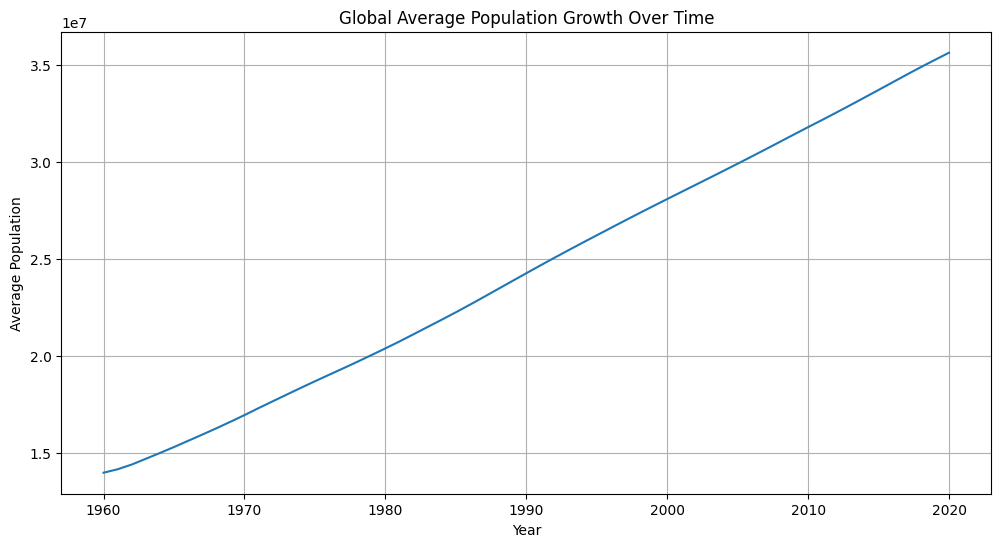

The plot shows a steady upward trend, indicating consistent population growth over time


In [ ]:

plt.figure(figsize=(12, 6))
long_data.groupby("Year")["Population"].mean().plot()
plt.title('Global Average Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()
print("The plot shows a steady upward trend, indicating consistent population growth over time")

*3.2. Boxplot to analyze population distribution for a given year (e.g., 2020)*

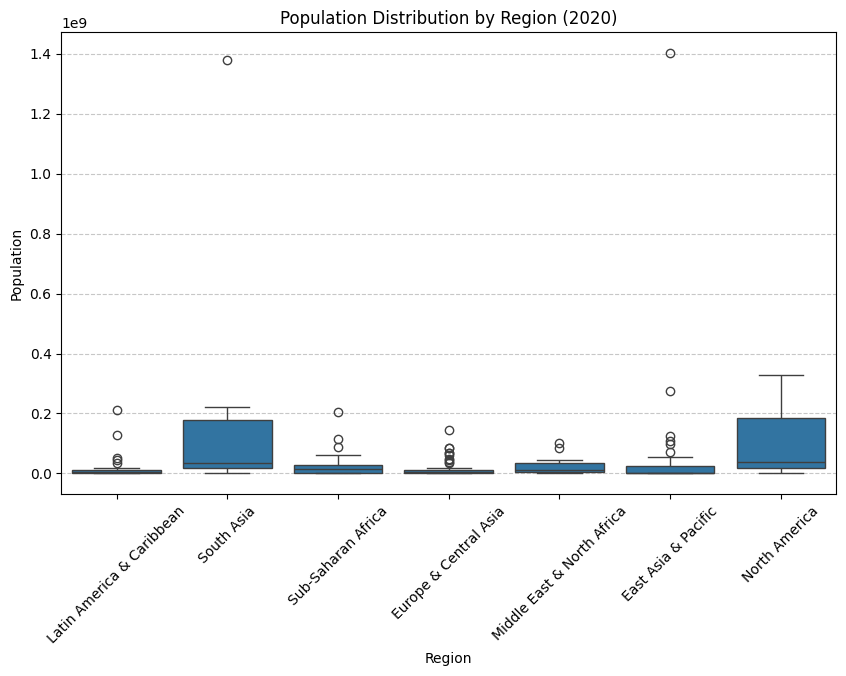

Population is mainly distribued by North America and South Asia in 2020


In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=long_data[long_data["Year"] == 2020], x="Region", y="Population")
plt.title('Population Distribution by Region (2020)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Population is mainly distribued by North America and South Asia in 2020")

*3.3 Analysis of first year 1960 and last year 2020*

In [ ]:
# summary statistics for 1960 and 2020
stats_1960 = long_data[long_data["Year"] == 1960]["Population"].describe()
stats_2020 = long_data[long_data["Year"] == 2020]["Population"].describe()

print("Population Summary - 1960:\n", stats_1960)
print("\nPopulation Summary - 2020:\n", stats_2020)

Population Summary - 1960:
 count    2.160000e+02
mean     1.395968e+07
std      5.745876e+07
min      2.833000e+03
25%      2.290598e+05
50%      2.337819e+06
75%      7.930551e+06
max      6.670700e+08
Name: Population, dtype: float64

Population Summary - 2020:
 count    2.160000e+02
mean     3.564962e+07
std      1.389124e+08
min      1.083400e+04
25%      7.828222e+05
50%      6.608077e+06
75%      2.457674e+07
max      1.402112e+09
Name: Population, dtype: float64


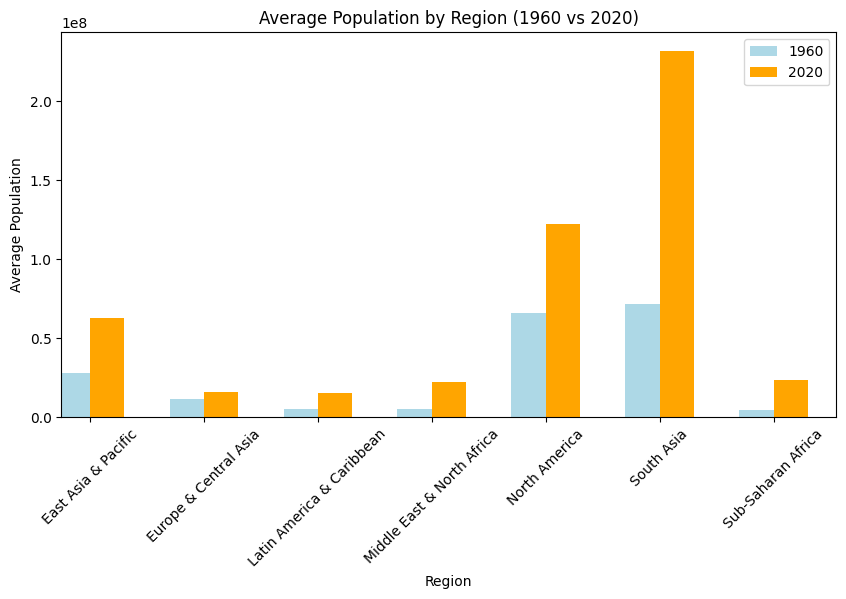

In [ ]:
avg_pop_1960 = long_data[long_data["Year"] == 1960].groupby('Region')["Population"].mean()
avg_pop_2020 = long_data[long_data["Year"] == 2020].groupby('Region')["Population"].mean()

# plotting side-by-side bar charts
plt.figure(figsize=(10, 5))
avg_pop_1960.plot(kind='bar', position=1, width=0.3, label='1960', color='lightblue')
avg_pop_2020.plot(kind='bar', position=0, width=0.3, label='2020', color='orange')
plt.title('Average Population by Region (1960 vs 2020)')
plt.xlabel('Region')
plt.ylabel('Average Population')
plt.xticks(rotation=45)
plt.legend()
plt.show()

*3.4 Finding the outliers*

<ipython-input-39-3b178897ba6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_data_cleaned["GrowthRateZ"] = zscore(long_data_cleaned["GrowthRate"])


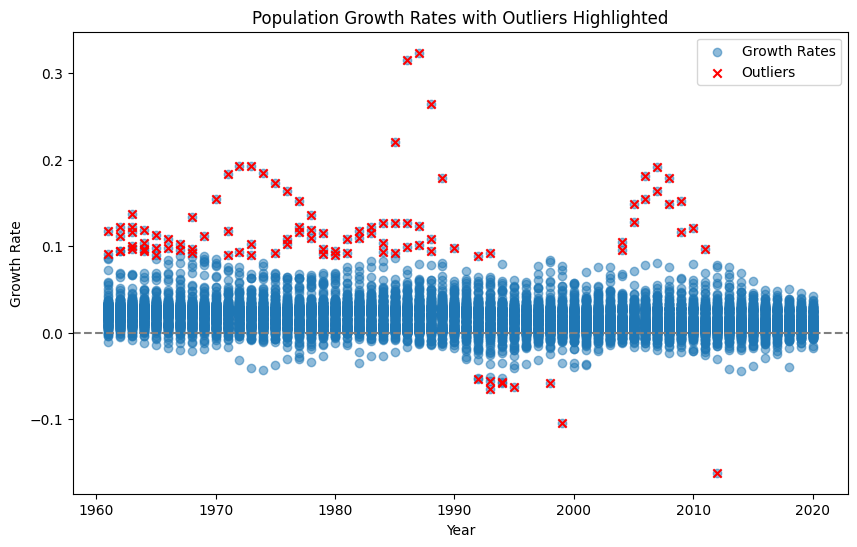

I found some outliers but deciced to let them in dateframe and maybe later more sophistacated analysis can be done.


In [ ]:
from scipy.stats import zscore

# calculate population growth rate (percentage change) between consecutive years
long_data["GrowthRate"] = long_data.groupby("Country Code")["Population"].pct_change()

long_data_cleaned = long_data.dropna(subset=["GrowthRate"])

# calculate z-scores for the growth rates
long_data_cleaned["GrowthRateZ"] = zscore(long_data_cleaned["GrowthRate"])

# defining outlier threshold (e.g., absolute z-score > 4)
outliers = long_data_cleaned[long_data_cleaned["GrowthRateZ"].abs() > 4]


# Optional: Visualize the outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(long_data_cleaned["Year"], long_data_cleaned["GrowthRate"], label='Growth Rates', alpha=0.5)
plt.scatter(outliers["Year"], outliers["GrowthRate"], color='red', label='Outliers', marker='x')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Population Growth Rates with Outliers Highlighted')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

print("I found some outliers but deciced to let them in dateframe and maybe later more sophistacated analysis can be done.")

*3.5 Calculating growth rates*

In [ ]:
print("Missing regions after melting:\n", long_data[long_data['Region'].isna()].drop_duplicates())

Missing regions after melting:
 Empty DataFrame
Columns: [Country Code, Indicator Name, Indicator Code, Region, IncomeGroup, Year, Population, GrowthRate]
Index: []


In [ ]:
# calculate growth rates by both Region and Country Code
long_data['GrowthRate'] = long_data.groupby(['Region', 'Country Code'])["Population"].pct_change()

# calculate the average growth rates for each country
avg_growth = long_data.groupby(['Region', 'Country Code'])['GrowthRate'].mean().sort_values(ascending=False)

# convert the result to a DataFrame for easier viewing
avg_growth_df = avg_growth.reset_index()

# display the top 10 fastest-growing countries with regions
print("Top 10 Fastest-Growing Countries with Regions:\n", avg_growth_df.head(10))

print("We can see countries in Middle East & Nortg Africa and Latin America are the countries with highest growth rate\n")

Top 10 Fastest-Growing Countries with Regions:
                        Region Country Code  GrowthRate
0  Middle East & North Africa          ARE    0.082206
1  Middle East & North Africa          QAT    0.071701
2  Middle East & North Africa          KWT    0.047993
3   Latin America & Caribbean          SXM    0.046142
4  Middle East & North Africa          DJI    0.042429
5   Latin America & Caribbean          MAF    0.041368
6  Middle East & North Africa          JOR    0.040811
7  Middle East & North Africa          BHR    0.040060
8  Middle East & North Africa          OMN    0.037926
9  Middle East & North Africa          SAU    0.036435
We can see countries in Middle East & Nortg Africa and Latin America are the countries with highest growth rate



*3.6 Correlation Analysis*

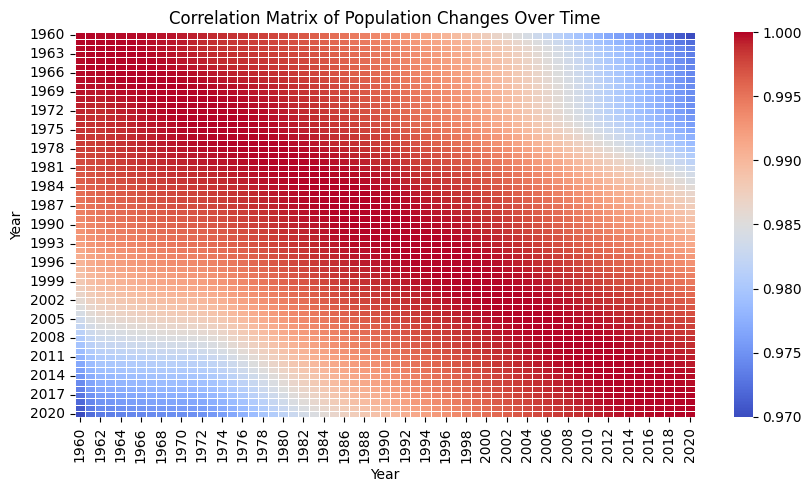

The population between consecutive years like 2019 and 2020 will have near-perfect correlation (1.0).
High correlation over multiple decades indicates a stable long-term trend in population growth.

The dataset shows strong autocorrelation across years, indicating a stable and predictable trend in population growth over time. 
This suggests that models like Prophet and ARIMA will likely perform well in forecasting future population changes due to the consistent temporal patterns.


In [ ]:
# select only the columns with population data (e.g., from 1960 to 2020)
population_data = long_data.pivot_table(index='Country Code', columns='Year', values='Population')

# calculate the correlation matrix
correlation_matrix = population_data.corr()

# plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Population Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Year')
plt.show()
print ("The population between consecutive years like 2019 and 2020 will have near-perfect correlation (1.0).\nHigh correlation over multiple decades indicates a stable long-term trend in population growth.\n")
print ("The dataset shows strong autocorrelation across years, indicating a stable and predictable trend in population growth over time. \nThis suggests that models like Prophet and ARIMA will likely perform well in forecasting future population changes due to the consistent temporal patterns.")

# **Step 4. Time Series Forecasting using Prophet**


In [ ]:
from prophet import Prophet

In [ ]:
# preparing data for prophet
prophet_data = long_data.groupby("Year")["Population"].sum().reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y'
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], format='%Y')
prophet_data.head()

,ds,y
0,1960-01-01,3.015291e+09
1,1961-01-01,3.054063e+09
2,1962-01-01,3.106344e+09
3,1963-01-01,3.170739e+09
4,1964-01-01,3.235513e+09


In [ ]:
# preparing model and fit the data
model = Prophet()
model.fit(prophet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwo6t1oo5/t9vwf18z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwo6t1oo5/vyq8xdd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44374', 'data', 'file=/tmp/tmpwo6t1oo5/t9vwf18z.json', 'init=/tmp/tmpwo6t1oo5/vyq8xdd7.json', 'output', 'file=/tmp/tmpwo6t1oo5/prophet_modelqyk697iq/prophet_model-20250209150612.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

future = model.make_future_dataframe(periods=5, freq='YE')


In [ ]:
forecast = model.predict(future)

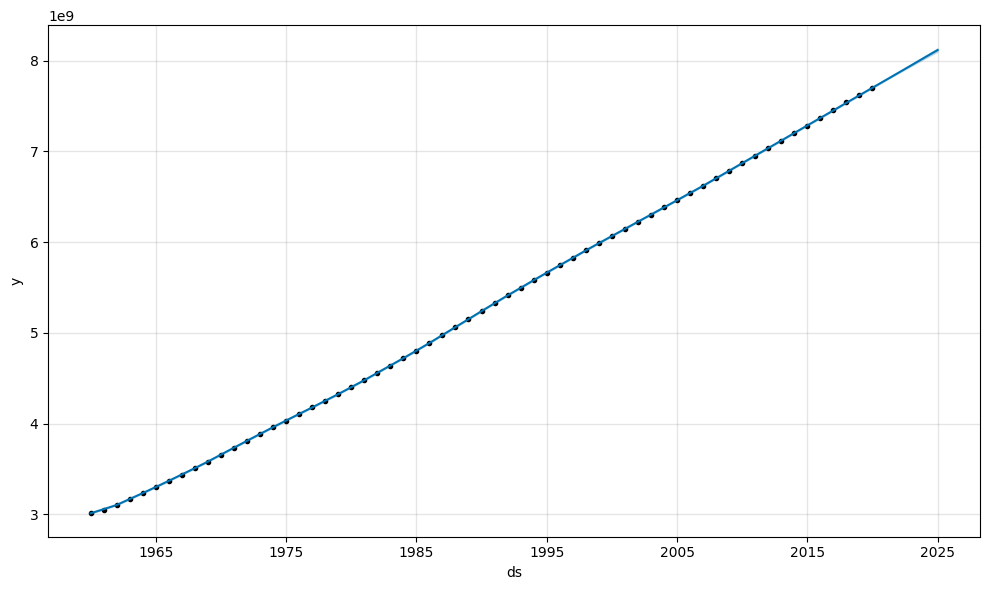

In [ ]:
model.plot(forecast);

In [ ]:
# changing the date of predicted years from end of the year to start of the year for better interpreatations
forecast['ds'] = forecast['ds'].apply(lambda x: pd.Timestamp(year=x.year, month=1, day=1))

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
56,2016-01-01,7.369386e+09,7.367434e+09,7.371189e+09
57,2017-01-01,7.452217e+09,7.450466e+09,7.454115e+09
58,2018-01-01,7.535976e+09,7.534118e+09,7.537912e+09
59,2019-01-01,7.619162e+09,7.617338e+09,7.621225e+09
60,2020-01-01,7.702010e+09,7.700035e+09,7.703842e+09
61,2020-01-01,7.784756e+09,7.782538e+09,7.786924e+09
62,2021-01-01,7.867634e+09,7.863717e+09,7.872002e+09
63,2022-01-01,7.950878e+09,7.943003e+09,7.958793e+09
64,2023-01-01,8.034718e+09,8.022189e+09,8.047927e+09
65,2024-01-01,8.117379e+09,8.100463e+09,8.135115e+09


# **Step 5. Results and Conclusion**

The table shows predicted global population for the years 2020 to 2024.
Column yhat represents the central forecasted population values.
Population is projected to reach around 8.12 billion by start of 2024.

The forecasted global population values increase steadily:


*   2021: ~7.87 billion.
*   2024: ~8.12 billion.

The population is predicted to grow by approximately 0.08 billion (80 million) people per year.

Model predicts a stable, linear growth in global population without sudden changes or irregularities.
There is minimal uncertainty in the predictions due to the consistency of historical data.
These results are ideal for short-term forecasting but may require further checks for long-term accuracy

**Forecasted Value (2025):**

yhat: ~8.117 billion (8,117,379,000)

**Current Real Data (2025):**

Estimates from worldometers.info  that population by end of the year 2024 was   ~8.161 billion (8 161,972,572)

In conclusion, the forecast aligns reasonably well with real-world data, indicating that Prophet provides a good basis for trend prediction. However, minor adjustments may be needed to account for recent shifts in global growth rates.

As a junior data scientist, I performed a basic population forecast using Prophet. The model accurately captures the long-term trend, predicting steady growth with low uncertainty. However, further checks are necessary to validate data consistency, explore regional differences, and assess the impact of external factors. This analysis forms a solid foundation for future enhancements